# Numerische Lösung von gewöhnlichen Differenzialgleichungen

__Manfred Brill, Hochschule Kaiserslautern__

In der Vorlesung hatten wir Feldlinien eines Vektorfelds eingeführt und festgehalten, dass wir für die Berechnung von Feldlinien Systeme von gewöhnlichen Differenzialgleichungen lösen müssen. In diesem Notebook betrachten wir das Euler-Verfahren und anschließend die Funktion *scipy.integrate.solve_ivp*.

## Das Euler-Verfahren
Das Euler-Verfahren für ein Anfangswertproblem ist einfach zu formulieren und genauso einfach zu implementieren. Wir beginnen mit dem Anfangswert, ersetzen die Ableitung in der expliziten Differenzialgleichung durch einen Differenzenquotienten und berechnen sukzessive eine Näherung der gesuchten Funktion an diskreten Punkten.

Wie schon in der Vorlesung betrachten wir als erstes Beispiel die explizite Differenzialgleichung

$
y'(t) = t + y.
$

Wir implementieren die rechte Seite dieser Gleichung als Funktion f und verwenden anschließend das Euler-Verfahren für die Berechnung von diskreten Werten für eine von uns gesetzte Schrittweite h. Das Ergebnis geben wir mit Hilfe eines Polygonzugs grafisch aus. Da wir das Euler-Verfahren später nicht verwenden verzichten wir auf die Implementieren einer Funktion und führen das Verfahren explizit durch.

In [1]:
def f(t, y):
    """
    Funktion für die rechte Seite der Differenzialgleichung
    """
    return (t + y)

Jetzt legen wir die Anfangsbedingung und insbesondere die Schrittweite für das Euler-Verfahren fest.

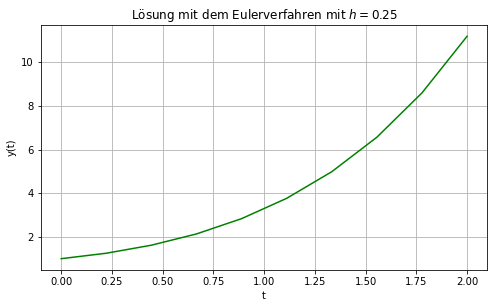

In [11]:
import numpy as np
import matplotlib.pyplot as plt

n = 9
a = 0.0
b = 2.0
h = (b-a)/(n-1)

t = np.linspace(a, b, num=n+1)
y = np.zeros(shape=(n+1,))

y[0] = 1.0
for i in np.arange(n):
    y[i+1] = y[i] + h*f(t[i], y[i])

fig = plt.figure(figsize=(8.0, 4.5))
plt.grid(True)

plt.plot(t, y, 'g-')
plt.title('Lösung mit dem Eulerverfahren mit $h=0.25$')
plt.xlabel('t')
plt.ylabel('y(t)')

plt.show()

Wir können uns schnell klar machen, dass der Fehler, den wir beim Euler-Verfahren machen immer weiter wächst und beim letzten Punkt, den wir berechnen, am größten ist. Das visualisieren wir durch eine Grafik, für die wir zwei Näherungen mit unterschiedlichen Schrittweiten grafische darstellen.

0.1


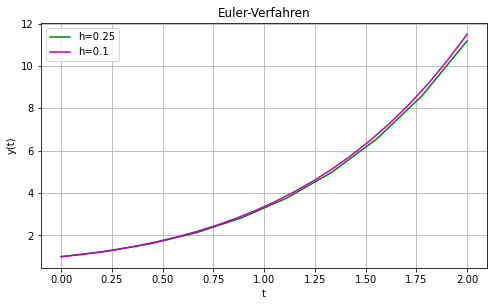

In [12]:
a = 0.0
b = 2.0
n = 9
h = (b-a)/(n-1)

t = np.linspace(a, b, num=n+1)
y = np.zeros(shape=(n+1,))

y[0] = 1.0
for i in np.arange(n):
    y[i+1] = y[i] + h*f(t[i], y[i])

fig = plt.figure(figsize=(8.0, 4.5))
plt.grid(True)
plt.plot(t, y, 'g-', label='h=0.25')

n = 21
h = (b-a)/(n-1)
print(h)
t = np.linspace(a, b, num=n+1)
y = np.zeros(shape=(n+1,))

y[0] = 1.0
for i in np.arange(n):
    y[i+1] = y[i] + h*f(t[i], y[i])

plt.plot(t, y, 'm-', label='h=0.1')

plt.title('Euler-Verfahren')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()

plt.show()

## Das Euler-Verfahren für Systeme von gewöhnlichen Differeznialgleichungen
Die Formulierung für das Euler-Verfahren für Systeme von Differenzialgleichungen unterscheidet sich nicht sehr stark von dem bisher verwendeten skalaren Fall. Die rechte Seite, die Funktion *f*, ist jetzt durch ein Vektorfeld gegeben. Dann können wir mit dem Euler-Verfahren Stromlinien von Vektorfeldern berechnen, was wir an Hand des Vektorfelds (-y, x) durchführen werden. Wir wissen aus der Vorlesung, dass die Stromlinien dieses Vektorfelds durch konzentrische Kreise gegeben sind.

Auch hier verzichten wir darauf eine Funktion für das Euler-Verfahren zu implementieren. Auch das Vektorfeld implementieren wir explizit in der Durchführung der Iteration. Am Ende geben wir das Ergebnis grafisch aus. Man erkennt gut, dass wir mit dem Euler-Verfahren keine Kreise berechnen, wenn die Schrittweite zu klein gewählt ist.

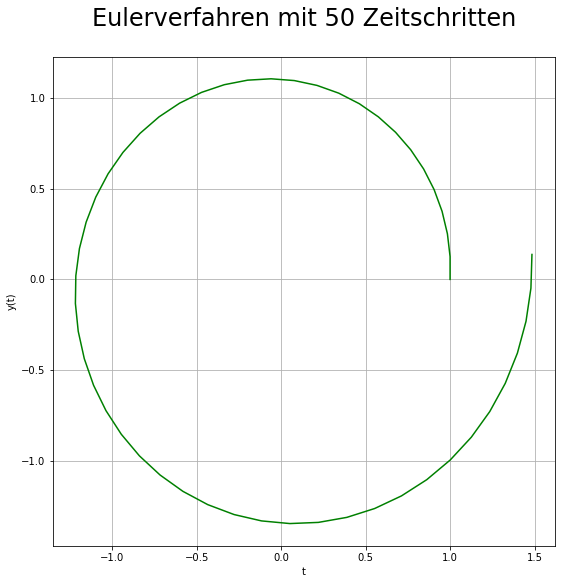

In [13]:
n = 51
a = 0.0
b = 2.0 * np.pi
h = (b-a)/(n-1)

t = np.linspace(a, b, num=n+1)
y = np.zeros(shape=(2, n+1))

y[0][0] = 1.0
y[1][0] = 0.0
for i in np.arange(n):
    y[0, i+1] = y[0, i] - h*y[1, i]
    y[1, i+1] = y[1, i] + h*y[0, i]

plt.figure(figsize=(9.0, 9.0))
plt.grid(True)

# Grafische Ausgabe
plt.plot(y[0, :], y[1, :], 'g-')
plt.title('Eulerverfahren mit 50 Zeitschritten',
          y=1.05, fontsize=24)
plt.xlabel('t')
plt.ylabel('y(t)')

plt.show()

Verwenden wir 100 oder sogar 1000 Punkte wird das Ergebnis besser. Das Euler-Verfahren konvergiert linear gegen die exakte Lösung.

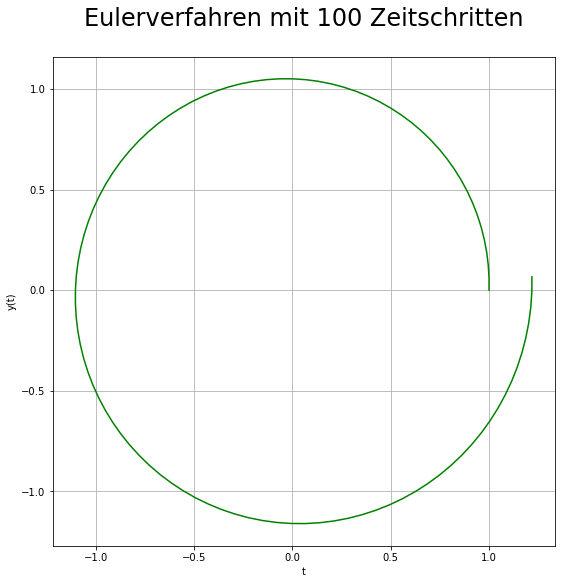

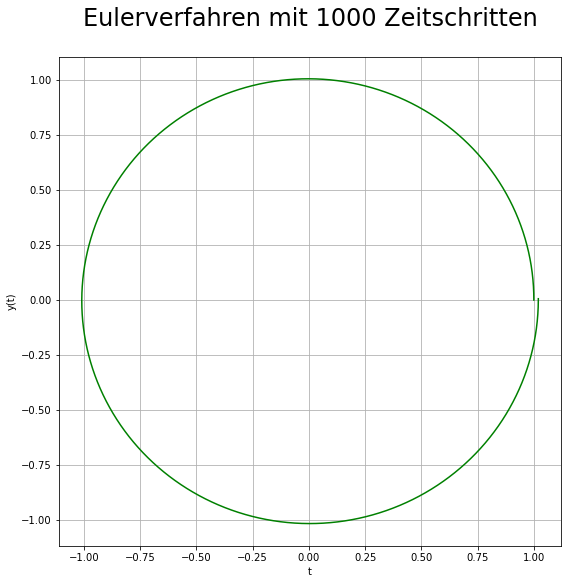

In [15]:
n =101
a = 0.0
b = 2.0 * np.pi
h = (b-a)/(n-1)

t = np.linspace(a, b, num=n+1)
y = np.zeros(shape=(2, n+1))

y[0][0] = 1.0
y[1][0] = 0.0
for i in np.arange(n):
    y[0, i+1] = y[0, i] - h*y[1, i]
    y[1, i+1] = y[1, i] + h*y[0, i]

plt.figure(figsize=(9.0, 9.0))
plt.grid(True)

# Grafische Ausgabe
plt.plot(y[0, :], y[1, :], 'g-')
plt.title('Eulerverfahren mit 100 Zeitschritten',
          y=1.05, fontsize=24)
plt.xlabel('t')
plt.ylabel('y(t)')

plt.show()

n = 1001
a = 0.0
b = 2.0 * np.pi
h = (b-a)/(n-1)

t = np.linspace(a, b, num=n+1)
y = np.zeros(shape=(2, n+1))

y[0][0] = 1.0
y[1][0] = 0.0
for i in np.arange(n):
    y[0, i+1] = y[0, i] - h*y[1, i]
    y[1, i+1] = y[1, i] + h*y[0, i]

plt.figure(figsize=(9.0, 9.0))
plt.grid(True)

# Grafische Ausgabe
plt.plot(y[0, :], y[1, :], 'g-')
plt.title('Eulerverfahren mit 1000 Zeitschritten',
          y=1.05, fontsize=24)
plt.xlabel('t')
plt.ylabel('y(t)')

plt.show()

## Lösung von gewöhnlichen Differenzialgleichungen mit SciPy
In SciPy finden wir die Funktion *integrate.solve.ivp*, die wir jetzt verwenden, um eine praktisch anwendbare Berechnung von Feldlinien oder allgemein von Lösungen von Anfangswertproblemen zu realisieren. Das Kürzel *ivp* im Namen der Funktion kommt vom englischen Begriff *initial value problem*.

Wir verwenden hier ausschließlich das Runge-Kutta-Verfahren, was auch die best practice für unsere Aufgabenstellung darstellt. Da Runge-Kutta eine Schrittweitensteuerung durchführt werden hier keine äquidistanten t-Werte erzeugt. Um für die grafische Ausgabe oder andere Anwendungen trotzdem wieder in äquidistanten t-Werten zu denken können wir SciPy t-Werte übergeben an denen die berechnete Lösung ausgewerten werden soll. Wir implementieren jetzt das Vektorfeld als Python-Funktion, da wir die rechte Seite des Systems als Argument übergebnen müssen und geben die berechnete Lösung grafisch aus.

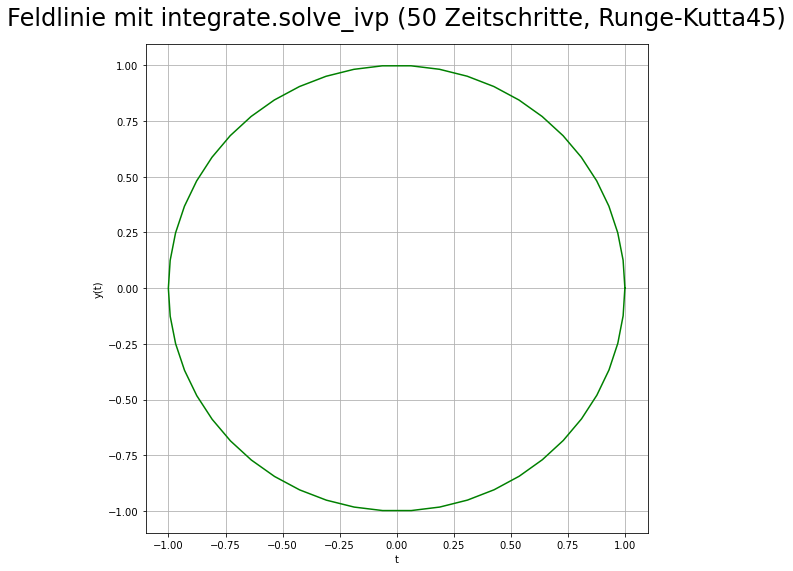

In [20]:
from scipy import integrate

def f(t, y):
    """
    Vektorfeld als rechte Seite des Systems von Differenzialgleichungen
    """
    return np.array([-y[1], y[0]])

a = 0.0
b = 2.0*np.pi
n = 51
eval = np.linspace(a, b, n)
ivs = np.array([1, 0])

sol = integrate.solve_ivp(fun=f, 
                          t_span=[a, b], 
                          y0=ivs,
                          t_eval=eval)
if sol.success:
    x = sol.y[0, :]
    y = sol.y[1, :]


plt.figure(figsize=(9.0, 9.0))
plt.grid(True)

# plt.plot(ivs[0], ivs[1], 'go')
plt.plot(x, y, 'g-')
plt.title('Feldlinie mit integrate.solve_ivp (50 Zeitschritte, Runge-Kutta45)',
          y=1.025, fontsize=24)
plt.xlabel('t')
plt.ylabel('y(t)')

plt.show()

Die Überlegenheit dieses Verfahrens ist sehr deutlich erkennbar.